In [118]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utide

In [119]:
data = "../data/charleston_sc-261b-usa-uhslc"

with open(data) as f:
    lines = f.readlines()

lines[:41]

['# FORMAT VERSION 5.0 Web: https://gesla.org Email: gesla.help@gmail.com\n',
 '# SITE NAME Charleston_SC\n',
 '# SITE CODE 261B\n',
 '# COUNTRY USA\n',
 '# CONTRIBUTOR University of Hawaii Sea Level Center\n',
 '# CONTRIBUTOR WEBSITE https://uhslc.soest.hawaii.edu\n',
 '# CONTRIBUTOR CONTACT philiprt@hawaii.edu\n',
 '# ORGINATOR  National Ocean Service (NOS), National Oceanic and Atmospheric Administration (NOAA), USA \n',
 '# ORIGINATOR WEBSITE Unspecified\n',
 '# ORIGINATOR CONTACT Unspecified\n',
 '# LATITUDE      32.78200000\n',
 '# LONGITUDE    -79.92500000\n',
 '# COORDINATE SYSTEM Unspecified\n',
 '# START DATE/TIME 1921/10/01 05:00:00\n',
 '# END DATE/TIME 2018/12/31 23:00:00\n',
 '# NUMBER OF YEARS 98\n',
 '# TIME ZONE HOURS 0\n',
 '# DATUM INFORMATION Unspecified\n',
 '# INSTRUMENT Unspecified\n',
 '# PRECISION Unspecified\n',
 '# NULL VALUE -99.9999\n',
 '# GAUGE TYPE Coastal\n',
 '# OVERALL RECORD QUALITY No obvious issues\n',
 '# \n',
 '# CREATION DATE UTC 2021/11/02\n',


In [120]:
names = ["date", "hour", "sealevel", "flag", "use_flag"]

obs = pd.read_csv(
    data,
    names=names,
    skiprows=41, # to skip the large header and documentation, would need to check whether this is the same for every time series
    skipinitialspace=True,
    delim_whitespace=True,
    na_values="-99.9999",
)

good_data = obs['use_flag'] == 1
bad_data = obs['use_flag'] == 0

obs.loc[bad_data, "sealevel"] = np.nan
obs["anomaly"] = obs['sealevel'] - obs['sealevel'].mean()

obs['datetime'] = pd.to_datetime(obs['date'] + ' ' +obs['hour'])

obs

,date,hour,sealevel,flag,use_flag,anomaly,datetime
0,1921/10/01,05:00:00,0.762,1,1,-0.899474,1921-10-01 05:00:00
1,1921/10/01,06:00:00,0.549,1,1,-1.112474,1921-10-01 06:00:00
2,1921/10/01,07:00:00,0.701,1,1,-0.960474,1921-10-01 07:00:00
3,1921/10/01,08:00:00,1.128,1,1,-0.533474,1921-10-01 08:00:00
4,1921/10/01,09:00:00,1.646,1,1,-0.015474,1921-10-01 09:00:00
...,...,...,...,...,...,...,...
852494,2018/12/31,19:00:00,2.254,1,1,0.592526,2018-12-31 19:00:00
852495,2018/12/31,20:00:00,2.400,1,1,0.738526,2018-12-31 20:00:00
852496,2018/12/31,21:00:00,2.410,1,1,0.748526,2018-12-31 21:00:00
852497,2018/12/31,22:00:00,2.261,1,1,0.599526,2018-12-31 22:00:00


In [121]:
coef = utide.solve(
    obs.datetime,
    obs.anomaly,
    lat=32.78200000,
    method="ols",
    conf_int="MC",
    verbose=False,
)

tide = utide.reconstruct(obs.datetime, coef, verbose=False)

tide

{'t_in': 0        1921-10-01 05:00:00
 1        1921-10-01 06:00:00
 2        1921-10-01 07:00:00
 3        1921-10-01 08:00:00
 4        1921-10-01 09:00:00
                  ...        
 852494   2018-12-31 19:00:00
 852495   2018-12-31 20:00:00
 852496   2018-12-31 21:00:00
 852497   2018-12-31 22:00:00
 852498   2018-12-31 23:00:00
 Name: datetime, Length: 852499, dtype: datetime64[ns],
 'epoch': None,
 'constit': None,
 'min_SNR': 2,
 'min_PE': 0,
 't_mpl': array([701539.20833333, 701539.25      , 701539.29166667, ...,
        737059.875     , 737059.91666667, 737059.95833333]),
 'h': array([-0.92263129, -1.13668685, -1.02883705, ...,  0.71685886,
         0.56723578,  0.27878223])}

In [75]:
obs['sealevel_tr'] = obs.anomaly - tide.h
obs

,date,hour,sealevel,flag,use_flag,anomaly,datetime,sealevel_tr
0,1921/10/01,05:00:00,0.762,1,1,-0.899474,1921-10-01 05:00:00,0.023157
1,1921/10/01,06:00:00,0.549,1,1,-1.112474,1921-10-01 06:00:00,0.024213
2,1921/10/01,07:00:00,0.701,1,1,-0.960474,1921-10-01 07:00:00,0.068363
3,1921/10/01,08:00:00,1.128,1,1,-0.533474,1921-10-01 08:00:00,0.083215
4,1921/10/01,09:00:00,1.646,1,1,-0.015474,1921-10-01 09:00:00,0.042818
...,...,...,...,...,...,...,...,...
852494,2018/12/31,19:00:00,2.254,1,1,0.592526,2018-12-31 19:00:00,0.040706
852495,2018/12/31,20:00:00,2.400,1,1,0.738526,2018-12-31 20:00:00,0.032914
852496,2018/12/31,21:00:00,2.410,1,1,0.748526,2018-12-31 21:00:00,0.031667
852497,2018/12/31,22:00:00,2.261,1,1,0.599526,2018-12-31 22:00:00,0.032290


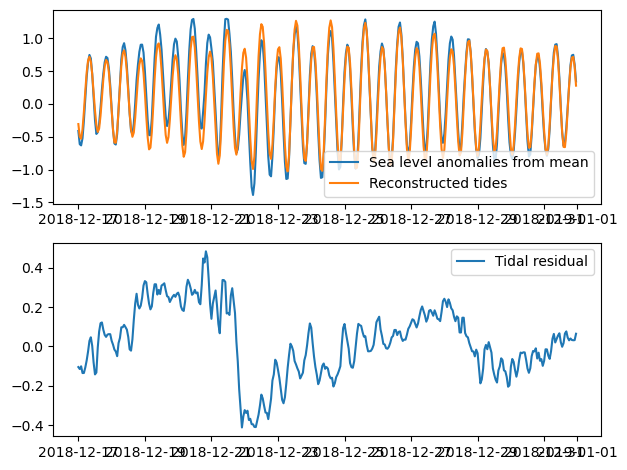

In [117]:
fig, axs = plt.subplots(ncols=1, nrows=2)

axs[0].plot(obs.datetime[(-15*24):], obs.anomaly[(-15*24):], label="Sea level anomalies from mean")
axs[0].plot(obs.datetime[(-15*24):], tide.h[(-15*24):], label="Reconstructed tides")
axs[0].legend()

axs[1].plot(obs.datetime[(-15*24):], obs.sealevel_tr[(-15*24):], label="Tidal residual")
axs[1].legend()

plt.tight_layout()

## We can now start to look at the distribution of tidal residuals and how our statistics may be sensitive to full sea level signals vs tidal residual signals

In [77]:
p999 = obs.sealevel_tr.quantile(1-1e-4) # for hourly datasets a .9999 quantile is approximately once every 10 years
p999

0.9010411355303549

Text(0.5, 1.0, 'Charleston tidal residuals (m)')

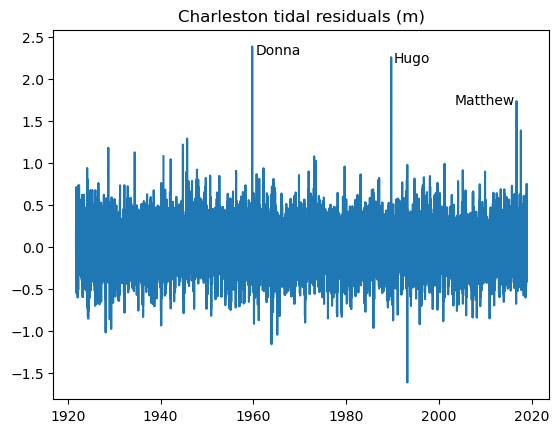

In [115]:
plt.plot(obs.datetime, obs.sealevel_tr, label="Sea level tidal residual")
plt.text(pd.to_datetime('1960-8-01 05:00:00'), 2.3, 'Donna')
plt.text(pd.to_datetime('1990-05-01 05:00:00'), 2.2, 'Hugo')
plt.text(pd.to_datetime('2003-6-01 05:00:00'), 1.7, 'Matthew')
plt.title("Charleston tidal residuals (m)")

In [ ]:
date